<a href="https://colab.research.google.com/github/sbbwoy/BDA/blob/main/%EB%B9%85%EB%B6%84%EB%B0%A9_0329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##4. Classification

In [ ]:
import pandas as pd
math = pd.read_csv('http://home.ewha.ac.kr/~josong/dm/mathcat.data', sep='\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


In [ ]:
math = math.drop('outcome', axis=1)

hscalc, course, passed는 categorical variable로 라벨 인코딩/원핫인코딩이 필요함

In [ ]:
math['hscalc'].value_counts()

Yes    373
No      21
Name: hscalc, dtype: int64

In [ ]:
math['passed'].value_counts()

Yes    236
No     158
Name: passed, dtype: int64

In [ ]:
math['course'].value_counts()

Mainstrm    328
Catch-up     35
Elite        31
Name: course, dtype: int64

Y(target)에 해당되는 passed는 라벨 인코딩

In [ ]:
#라벨 인코딩
from sklearn.preprocessing import LabelEncoder
items = math.columns[4::2]
le = LabelEncoder()

for i in items:
    math[i] = le.fit_transform(math[i])

math.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,0
2,66.0,75,Yes,Mainstrm,1
3,80.2,70,Yes,Mainstrm,1
4,81.7,67,Yes,Mainstrm,1
5,86.8,80,Yes,Mainstrm,1


In [ ]:
mymath1 = math.copy()
mymath2 = math.copy()

one-hot encoding을 하기 위한 두 가지 방법
1. pandas의 pd.get_dummies

In [ ]:
import pandas as pd
pd.get_dummies(mymath1['course'])

,Catch-up,Elite,Mainstrm
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
390,0,0,1
391,0,0,1
392,0,0,1
393,0,0,1


In [ ]:
mymath1 = pd.get_dummies(data = mymath1, columns = ['course', 'hscalc'], prefix = ['course', 'hsclac'])
mymath1

,hsgpa,hsengl,passed,course_Catch-up,course_Elite,course_Mainstrm,hsclac_No,hsclac_Yes
1,78.0,80,0,0,0,1,0,1
2,66.0,75,1,0,0,1,0,1
3,80.2,70,1,0,0,1,0,1
4,81.7,67,1,0,0,1,0,1
5,86.8,80,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
390,88.3,90,1,0,0,1,0,1
391,77.0,79,1,0,0,1,0,1
392,80.7,70,1,0,0,1,0,1
393,80.7,81,1,0,0,1,0,1


* LabelEncode는 alphabetic order로 라벨 인코딩을 진행
* 3개 이상의 범주형 변수에 대해서 라벨 인코딩만 할 경우 파이썬은 이 변수를 numeric 변수로 인식하기 때문에 반드시 원-핫 인코딩을 통해 범주형 변수로 인식할 수 있도록 변환해야 함
* pd.get_dummies에서 prefix 옵션은 원래 컬ㄻ의 이름을 앞에 붙여주도록 한다

2. sklearn의 OneHotEncoder를 이용
- sklearn의 OneHotEncoder를 이용하는 경우 벡터의 입력을 허용하지 않기 때문에, reshape 메서드를 통해 array로 변환 후 입력해야 함

In [ ]:
#one-hot encoding을 할 column 추출

#mymath2[['course']]는 벡터로 추출되므로 원핫인코딩 과정에서 에러발생
labels = mymath2['course']
print(type(labels))

#Series -> array
labels = labels.values.reshape(-1, 1)
print(type(labels))
print(labels.shape)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
(394, 1)


In [ ]:
#OneHotEncoding 모델 정의
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

이때 옵션에서 sparse=True가 디폴트. 이 옵션을 matrix로 반환함. 그러나, 원핫인코딩에서 데이터 array형으로 다루기 때문에 sparse=False로 지정

In [ ]:
#One-Hot Encoding
mycourse = mymath2['course']
mycourse = mycourse.values.reshape(-1, 1)

ohe.fit(mycourse)
one_hot_encoded = ohe.transform(mycourse)

#dataframe
ohe_df = pd.DataFrame(one_hot_encoded, columns = ohe.categories_[0])
ohe_df

,Catch-up,Elite,Mainstrm
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
389,0.0,0.0,1.0
390,0.0,0.0,1.0
391,0.0,0.0,1.0
392,0.0,0.0,1.0


In [ ]:
ohe_df.index = ohe_df.index+1

mydf = pd.concat([mymath2, ohe_df], axis=1)
mydf.head()

,hsgpa,hsengl,hscalc,course,passed,Catch-up,Elite,Mainstrm
1,78.0,80,Yes,Mainstrm,0,0.0,0.0,1.0
2,66.0,75,Yes,Mainstrm,1,0.0,0.0,1.0
3,80.2,70,Yes,Mainstrm,1,0.0,0.0,1.0
4,81.7,67,Yes,Mainstrm,1,0.0,0.0,1.0
5,86.8,80,Yes,Mainstrm,1,0.0,0.0,1.0


In [ ]:
myhscalc = mymath2['hscalc']
myhscalc = myhscalc.values.reshape(-1, 1)

ohe.fit(myhscalc)
one_hot_encoded = ohe.transform(myhscalc)

ohe_df = pd.DataFrame(one_hot_encoded, columns = ohe.categories_[0])

ohe_df.idex=ohe_df.index+1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


In [ ]:
mydf.drop(['hscalc', 'course'], axis=1)

,hsgpa,hsengl,passed,Catch-up,Elite,Mainstrm
1,78.0,80,0,0.0,0.0,1.0
2,66.0,75,1,0.0,0.0,1.0
3,80.2,70,1,0.0,0.0,1.0
4,81.7,67,1,0.0,0.0,1.0
5,86.8,80,1,0.0,0.0,1.0
...,...,...,...,...,...,...
390,88.3,90,1,0.0,0.0,1.0
391,77.0,79,1,0.0,0.0,1.0
392,80.7,70,1,0.0,0.0,1.0
393,80.7,81,1,0.0,0.0,1.0


In [ ]:
y = mymath1.iloc[:, 2]
mymath1.pop('passed')
X = mymath1.iloc[:, :]

In [ ]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

mymodel = LogisticRegression()
mymodel.fit(X, y)

LogisticRegression()

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
mymtx = confusion_matrix(mymodel.predict(X), y)
mymtx

array([[ 98,  38],
       [ 60, 198]])

In [ ]:
#misclass rate
misclass_rate = (mymtx[0, 1] + mymtx[1, 0]) / (sum(sum(mymtx)))
misclass_rate

0.24873096446700507

In [ ]:
#오분류율을 최소화하는 경계확률과 그때의 오분류율을 구하는 코드

def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

#class 1에 속할 확률, [:, 0]인 경우 class 0dp thrgkf ghkrfbf
prob = mymodel.predict_proba(X)[:, 1]

mylist = []
result = {}

n = len(math)

for i in range_with_floats(0.4, 0.601, 0.001):
    for j in range(0, n):
        if prob[j] >= i:
            mylist.append(1)
        else:
            mylist.append(0)
    
    mymtx = confusion_matrix(mylist, y)

    missrate = (mymtx[0, 1] + mymtx[1, 0]) / (sum(sum(mymtx)))

    result[round(1, 3)] = round(missrate, 4)

    mylist = []

In [ ]:
print(f'최소의 오분류율은 {min(result.values())} 이며 이때의 경계 확률은 {min(result, key=result.get)} 이다')

최소의 오분류율은 0.2716 이며 이때의 경계 확률은 1 이다


classfication이 잘 되었는지 확인하는 방법
1. 오분류율
2. 1-오분류율

##LDA(Linear Discriminant Analysis)

종속변수를 분류하기 위한 모델. 각 범주에 속할 '확률'을 예측하는 형태로 분류

LDA의 두 가지 가정
* 각 class가 정규분포 형태의 확률분포를 가진다
* 각 class는 같은 형태의 공분산 구조를 가진다.

-> 설명변수의 클래스가 k(k = 1, ..., k)개 존재하며 설명변수의 개수는 p(p-dim)개라고 가정. 위의 가정에 따라, P(X|Y = K)가 정규분포를 따른다. 이때, LDA를 이용하여 계산하는 것은 P(Y = K|X)로 class conditional probability를 구하는 과정. 베이즈 정리를 이용해 계산 가능.

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [ ]:
#LDA
lda = LinearDiscriminantAnalysis(n_components=2)    #n_component=(number of class - 1)
result = lda.fit(X, y).transform(X)

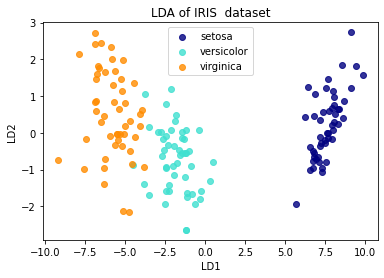

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        result[y == i, 0], result[y ==i, 1], alpha=0.8, color=color, label=target_name
    )
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best', shadow=False, scatterpoints=1)  
plt.title('LDA of IRIS  dataset')
plt.show()

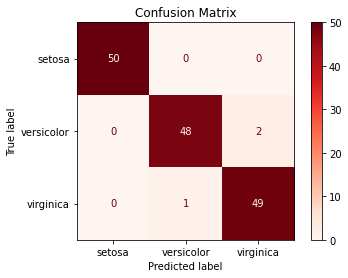

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#confusion matrix
label = ['setosa', 'versicolor', 'virginica']
plot = plot_confusion_matrix(lda, X, y, display_labels = label, cmap = plt.cm.Reds, normalize=None)
plot.ax_.set_title('Confusion Matrix')
plt.show()

오분류율 = 3/150

In [ ]:
from sklearn.metrics import confusion_matrix
mtx = confusion_matrix(y, lda.predict(X))
mtx

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

In [ ]:
table = pd.DataFrame(mtx, columns=label, index=label)
table

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49


##5. CART(Classification and Regression Tree)

: 의사결정 규칙을 도표화해 관심대상이 되는 집단을 몇 개의 소집단으로 분류하거나 예측하는 분석 방법. 데이터 마이닝 기법 중 하나인 decision tree는 각 자료 내에 존재하는 관계와 규칙을 탐색하고 찾아내 모형화함. DT는 반복적으로 분류 규칙을 생성해 가장 효과적인 분류 규칙 조합을 완성해가며, 의사 결정 규칙을 나무 구조로 나타내어 전체 자료를 몇 개의 소집단으로 분류/예측함.

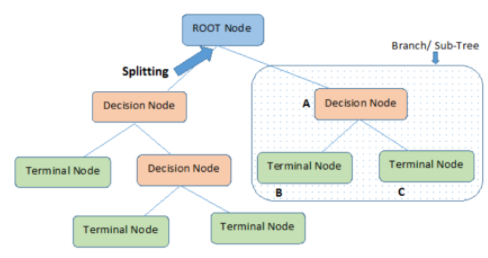